**My Personal Notebook for Playing Around With the Data**

**Importing all required libraries**

In [1]:
import pandas as pd
import numpy as np

#import geopandas as gpd


#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt


**Saving the data into a dataframe**

In [2]:
df_house = pd.read_csv("data/eda.csv")

df_house.head()

date     price    house_id  id        id.1  bedrooms  bathrooms  \
0  2014-10-13  221900.0  7129300520   1  7129300520       3.0       1.00   
1  2014-12-09  538000.0  6414100192   2  6414100192       3.0       2.25   
2  2015-02-25  180000.0  5631500400   3  5631500400       2.0       1.00   
3  2014-12-09  604000.0  2487200875   4  2487200875       4.0       3.00   
4  2015-02-18  510000.0  1954400510   5  1954400510       3.0       2.00   

   sqft_living  sqft_lot  floors  ...  grade  sqft_above  sqft_basement  \
0       1180.0    5650.0     1.0  ...      7      1180.0            0.0   
1       2570.0    7242.0     2.0  ...      7      2170.0          400.0   
2        770.0   10000.0     1.0  ...      6       770.0            0.0   
3       1960.0    5000.0     1.0  ...      7      1050.0          910.0   
4       1680.0    8080.0     1.0  ...      8      1680.0            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257         1340.0   
1      1951       19910.0    98125  47.7210 -122.319         1690.0   
2      1933           NaN    98028  47.7379 -122.233         2720.0   
3      1965           0.0    98136  47.5208 -122.393         1360.0   
4      1987           0.0    98074  47.6168 -122.045         1800.0   

   sqft_lot15  
0      5650.0  
1      7639.0  
2      8062.0  
3      5000.0  
4      7503.0  

[5 rows x 23 columns]

**Exploring the data**

In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [4]:
# import missingno
import missingno as msno

In [5]:
# display number of missing values per column
df_house.isna().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

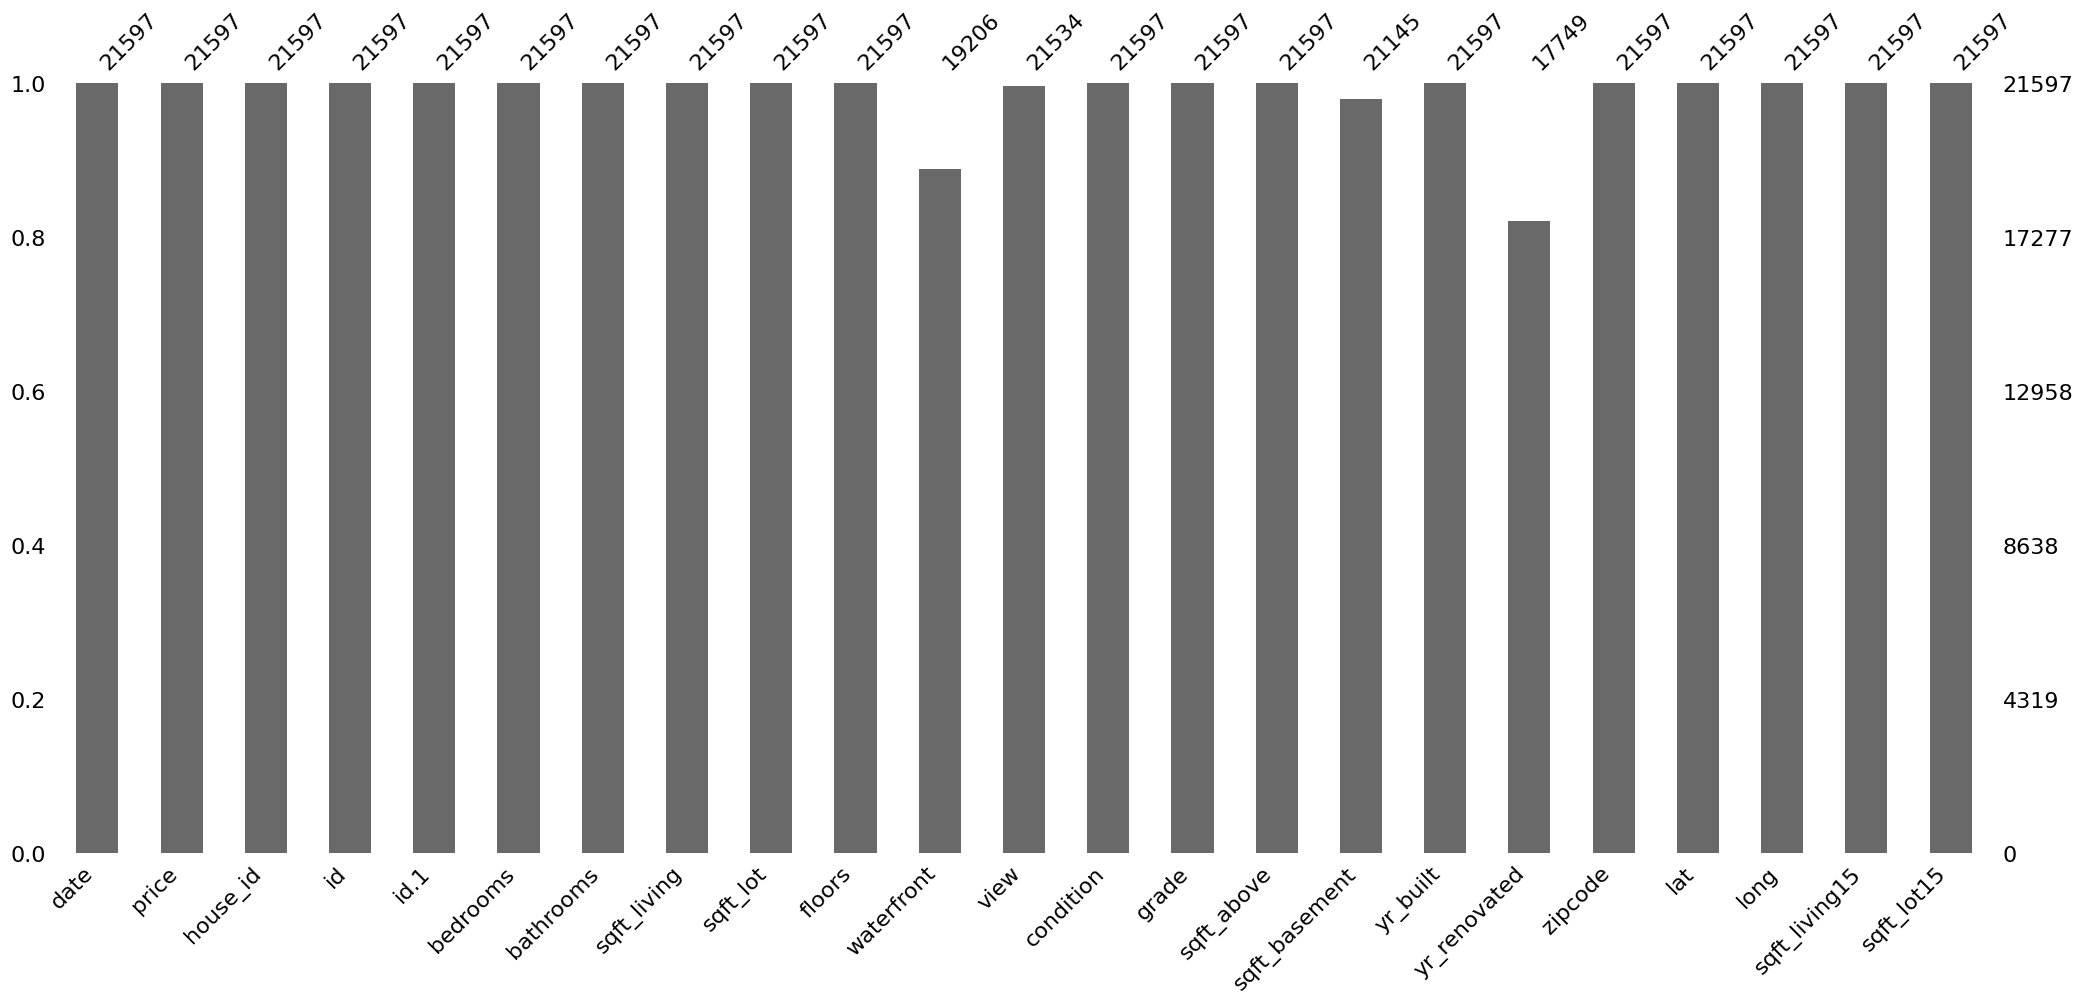

In [6]:
# plotting percentage of missing values per column
msno.bar(df_house)

<Axes: >

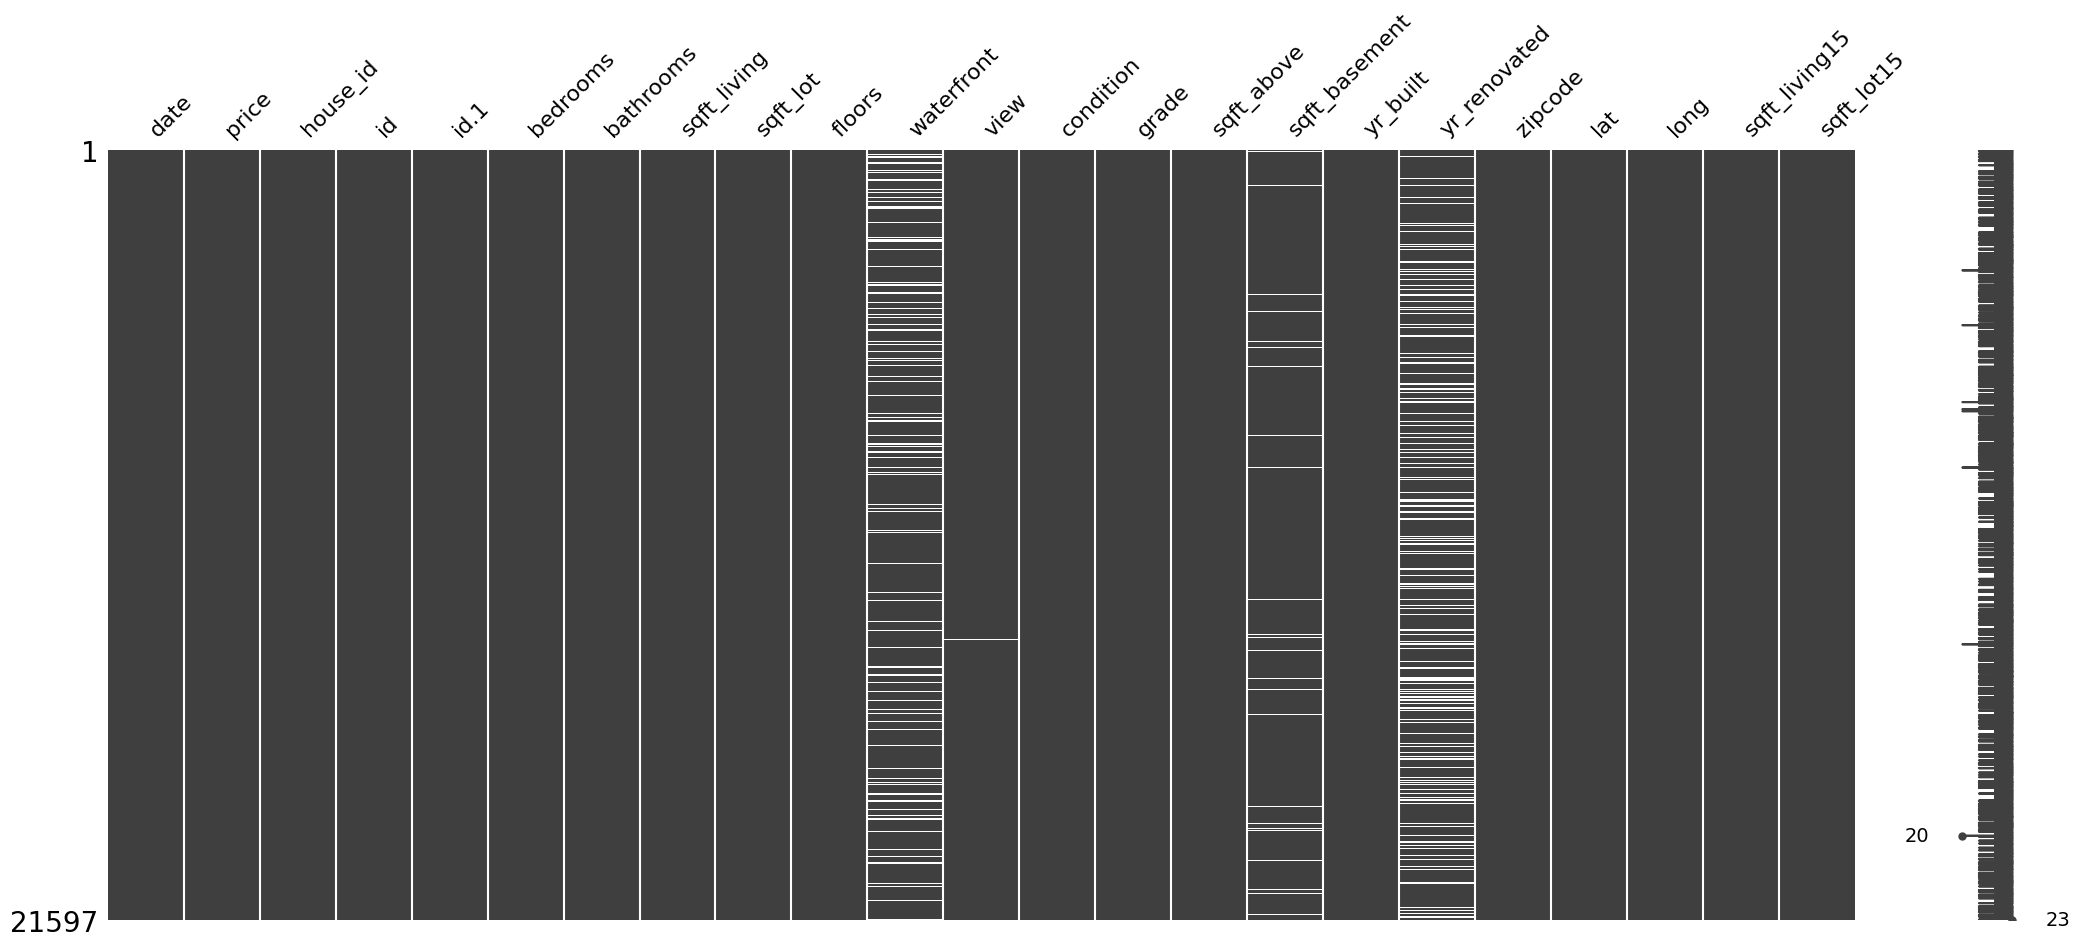

In [7]:
msno.matrix(df_house)

In [8]:
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df_house.columns = df_house.columns.str.replace('.','_')
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# renaming column
df_house = df_house.rename({'lat':'latitude','long':'longitude',
                            'sqft_living15':'living_space_15_neighbours', 'sqft_lot15':'plotsize_15_neighbours',
                            'sqft_living':'livingspace_sqft', 'sqft_lot':'plotsize_sqft',
                            'view':'num_potential_buyers'}, axis=1)
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'livingspace_sqft', 'plotsize_sqft', 'floors', 'waterfront',
       'num_potential_buyers', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'latitude',
       'longitude', 'living_space_15_neighbours', 'plotsize_15_neighbours'],
      dtype='object')

In [11]:
# check how many duplicated rows exist in the data frame
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [12]:
df_house.dtypes

date                           object
price                         float64
house_id                        int64
id                              int64
id_1                            int64
bedrooms                      float64
bathrooms                     float64
livingspace_sqft              float64
plotsize_sqft                 float64
floors                        float64
waterfront                    float64
num_potential_buyers          float64
condition                       int64
grade                           int64
sqft_above                    float64
sqft_basement                 float64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
latitude                      float64
longitude                     float64
living_space_15_neighbours    float64
plotsize_15_neighbours        float64
dtype: object

In [13]:
# Convert date to datetime format 
df_house.date = pd.to_datetime(df_house.date)
print(df_house['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]


In [14]:
df_house.head()

date     price    house_id  id        id_1  bedrooms  bathrooms  \
0 2014-10-13  221900.0  7129300520   1  7129300520       3.0       1.00   
1 2014-12-09  538000.0  6414100192   2  6414100192       3.0       2.25   
2 2015-02-25  180000.0  5631500400   3  5631500400       2.0       1.00   
3 2014-12-09  604000.0  2487200875   4  2487200875       4.0       3.00   
4 2015-02-18  510000.0  1954400510   5  1954400510       3.0       2.00   

   livingspace_sqft  plotsize_sqft  floors  ...  grade  sqft_above  \
0            1180.0         5650.0     1.0  ...      7      1180.0   
1            2570.0         7242.0     2.0  ...      7      2170.0   
2             770.0        10000.0     1.0  ...      6       770.0   
3            1960.0         5000.0     1.0  ...      7      1050.0   
4            1680.0         8080.0     1.0  ...      8      1680.0   

   sqft_basement  yr_built  yr_renovated  zipcode  latitude  longitude  \
0            0.0      1955           0.0    98178   47.5112   -122.257   
1          400.0      1951       19910.0    98125   47.7210   -122.319   
2            0.0      1933           NaN    98028   47.7379   -122.233   
3          910.0      1965           0.0    98136   47.5208   -122.393   
4            0.0      1987           0.0    98074   47.6168   -122.045   

   living_space_15_neighbours  plotsize_15_neighbours  
0                      1340.0                  5650.0  
1                      1690.0                  7639.0  
2                      2720.0                  8062.0  
3                      1360.0                  5000.0  
4                      1800.0                  7503.0  

[5 rows x 23 columns]

In [15]:
#plt.bar(df_house.zipcode,df_house.price)

In [16]:
df_house['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 0, 'Prices')

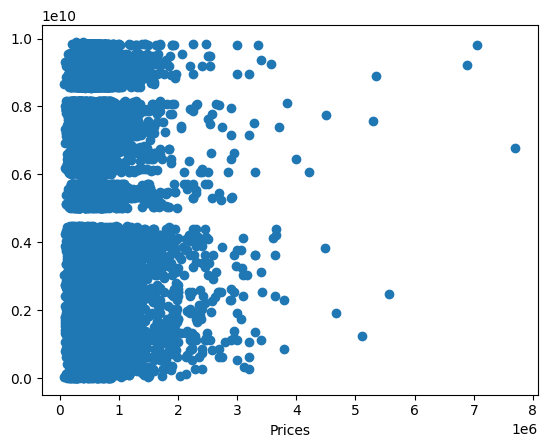

In [17]:
plt.scatter(df_house.price, df_house.house_id)
plt.xlabel('Prices')

In [18]:
type(df_house.yr_renovated[3])
df_house.yr_renovated.head()

0        0.0
1    19910.0
2        NaN
3        0.0
4        0.0
Name: yr_renovated, dtype: float64

In [19]:
df_house.dtypes
df_house.head()

date     price    house_id  id        id_1  bedrooms  bathrooms  \
0 2014-10-13  221900.0  7129300520   1  7129300520       3.0       1.00   
1 2014-12-09  538000.0  6414100192   2  6414100192       3.0       2.25   
2 2015-02-25  180000.0  5631500400   3  5631500400       2.0       1.00   
3 2014-12-09  604000.0  2487200875   4  2487200875       4.0       3.00   
4 2015-02-18  510000.0  1954400510   5  1954400510       3.0       2.00   

   livingspace_sqft  plotsize_sqft  floors  ...  grade  sqft_above  \
0            1180.0         5650.0     1.0  ...      7      1180.0   
1            2570.0         7242.0     2.0  ...      7      2170.0   
2             770.0        10000.0     1.0  ...      6       770.0   
3            1960.0         5000.0     1.0  ...      7      1050.0   
4            1680.0         8080.0     1.0  ...      8      1680.0   

   sqft_basement  yr_built  yr_renovated  zipcode  latitude  longitude  \
0            0.0      1955           0.0    98178   47.5112   -122.257   
1          400.0      1951       19910.0    98125   47.7210   -122.319   
2            0.0      1933           NaN    98028   47.7379   -122.233   
3          910.0      1965           0.0    98136   47.5208   -122.393   
4            0.0      1987           0.0    98074   47.6168   -122.045   

   living_space_15_neighbours  plotsize_15_neighbours  
0                      1340.0                  5650.0  
1                      1690.0                  7639.0  
2                      2720.0                  8062.0  
3                      1360.0                  5000.0  
4                      1800.0                  7503.0  

[5 rows x 23 columns]

In [20]:
# Use fillna to impute missing values
df_house["waterfront"] = df_house.waterfront.fillna(0)

# Replace missing values in "sqft_basement" with values from "sqft_living"
df_house['sqft_basement'].fillna(df_house['livingspace_sqft'], inplace=True)

# turn yr_built and yr_renovated into year datetime
df_house['yr_renovated'] = df_house['yr_renovated'].astype(str).apply(lambda x: x.replace('0.0',''))
df_house['yr_renovated'] = pd.to_datetime(df_house.yr_renovated).dt.strftime('%Y')
df_house["yr_renovated"] = df_house.yr_renovated.fillna(0)

df_house['yr_built'] = df_house['yr_built'].astype(str).apply(lambda x: x.replace('0.0',''))
df_house['yr_built'] = pd.to_datetime(df_house.yr_built).dt.strftime('%Y')

# Fill potential_buyers with 0
df_house["num_potential_buyers"] = df_house.num_potential_buyers.fillna(0)

In [21]:
# Rounding bathrooms and floors
df_house['bathrooms'] = df_house.bathrooms.round()
df_house['floors'] = df_house.floors.round()


In [22]:
df_house.head()

date     price    house_id  id        id_1  bedrooms  bathrooms  \
0 2014-10-13  221900.0  7129300520   1  7129300520       3.0        1.0   
1 2014-12-09  538000.0  6414100192   2  6414100192       3.0        2.0   
2 2015-02-25  180000.0  5631500400   3  5631500400       2.0        1.0   
3 2014-12-09  604000.0  2487200875   4  2487200875       4.0        3.0   
4 2015-02-18  510000.0  1954400510   5  1954400510       3.0        2.0   

   livingspace_sqft  plotsize_sqft  floors  ...  grade  sqft_above  \
0            1180.0         5650.0     1.0  ...      7      1180.0   
1            2570.0         7242.0     2.0  ...      7      2170.0   
2             770.0        10000.0     1.0  ...      6       770.0   
3            1960.0         5000.0     1.0  ...      7      1050.0   
4            1680.0         8080.0     1.0  ...      8      1680.0   

   sqft_basement  yr_built  yr_renovated  zipcode latitude longitude  \
0            0.0      1955             0    98178  47.5112  -122.257   
1          400.0      1951          1991    98125  47.7210  -122.319   
2            0.0      1933             0    98028  47.7379  -122.233   
3          910.0      1965             0    98136  47.5208  -122.393   
4            0.0      1987             0    98074  47.6168  -122.045   

   living_space_15_neighbours  plotsize_15_neighbours  
0                      1340.0                  5650.0  
1                      1690.0                  7639.0  
2                      2720.0                  8062.0  
3                      1360.0                  5000.0  
4                      1800.0                  7503.0  

[5 rows x 23 columns]

In [23]:
print(df_house.dtypes)

date                          datetime64[ns]
price                                float64
house_id                               int64
id                                     int64
id_1                                   int64
bedrooms                             float64
bathrooms                            float64
livingspace_sqft                     float64
plotsize_sqft                        float64
floors                               float64
waterfront                           float64
num_potential_buyers                 float64
condition                              int64
grade                                  int64
sqft_above                           float64
sqft_basement                        float64
yr_built                              object
yr_renovated                          object
zipcode                                int64
latitude                             float64
longitude                            float64
living_space_15_neighbours           float64
plotsize_1

In [24]:
df_house.tail()

date     price    house_id     id        id_1  bedrooms  \
21592 2014-05-21  360000.0   263000018  21593   263000018       3.0   
21593 2015-02-23  400000.0  6600060120  21594  6600060120       4.0   
21594 2014-06-23  402101.0  1523300141  21595  1523300141       2.0   
21595 2015-01-16  400000.0   291310100  21596   291310100       3.0   
21596 2014-10-15  325000.0  1523300157  21597  1523300157       2.0   

       bathrooms  livingspace_sqft  plotsize_sqft  floors  ...  grade  \
21592        2.0            1530.0         1131.0     3.0  ...      8   
21593        2.0            2310.0         5813.0     2.0  ...      8   
21594        1.0            1020.0         1350.0     2.0  ...      7   
21595        2.0            1600.0         2388.0     2.0  ...      8   
21596        1.0            1020.0         1076.0     2.0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode latitude  \
21592      1530.0            0.0      2009             0    98103  47.6993   
21593      2310.0            0.0      2014             0    98146  47.5107   
21594      1020.0            0.0      2009             0    98144  47.5944   
21595      1600.0            0.0      2004             0    98027  47.5345   
21596      1020.0            0.0      2008             0    98144  47.5941   

      longitude  living_space_15_neighbours  plotsize_15_neighbours  
21592  -122.346                      1530.0                  1509.0  
21593  -122.362                      1830.0                  7200.0  
21594  -122.299                      1020.0                  2007.0  
21595  -122.069                      1410.0                  1287.0  
21596  -122.299                      1020.0                  1357.0  

[5 rows x 23 columns]

<Axes: >

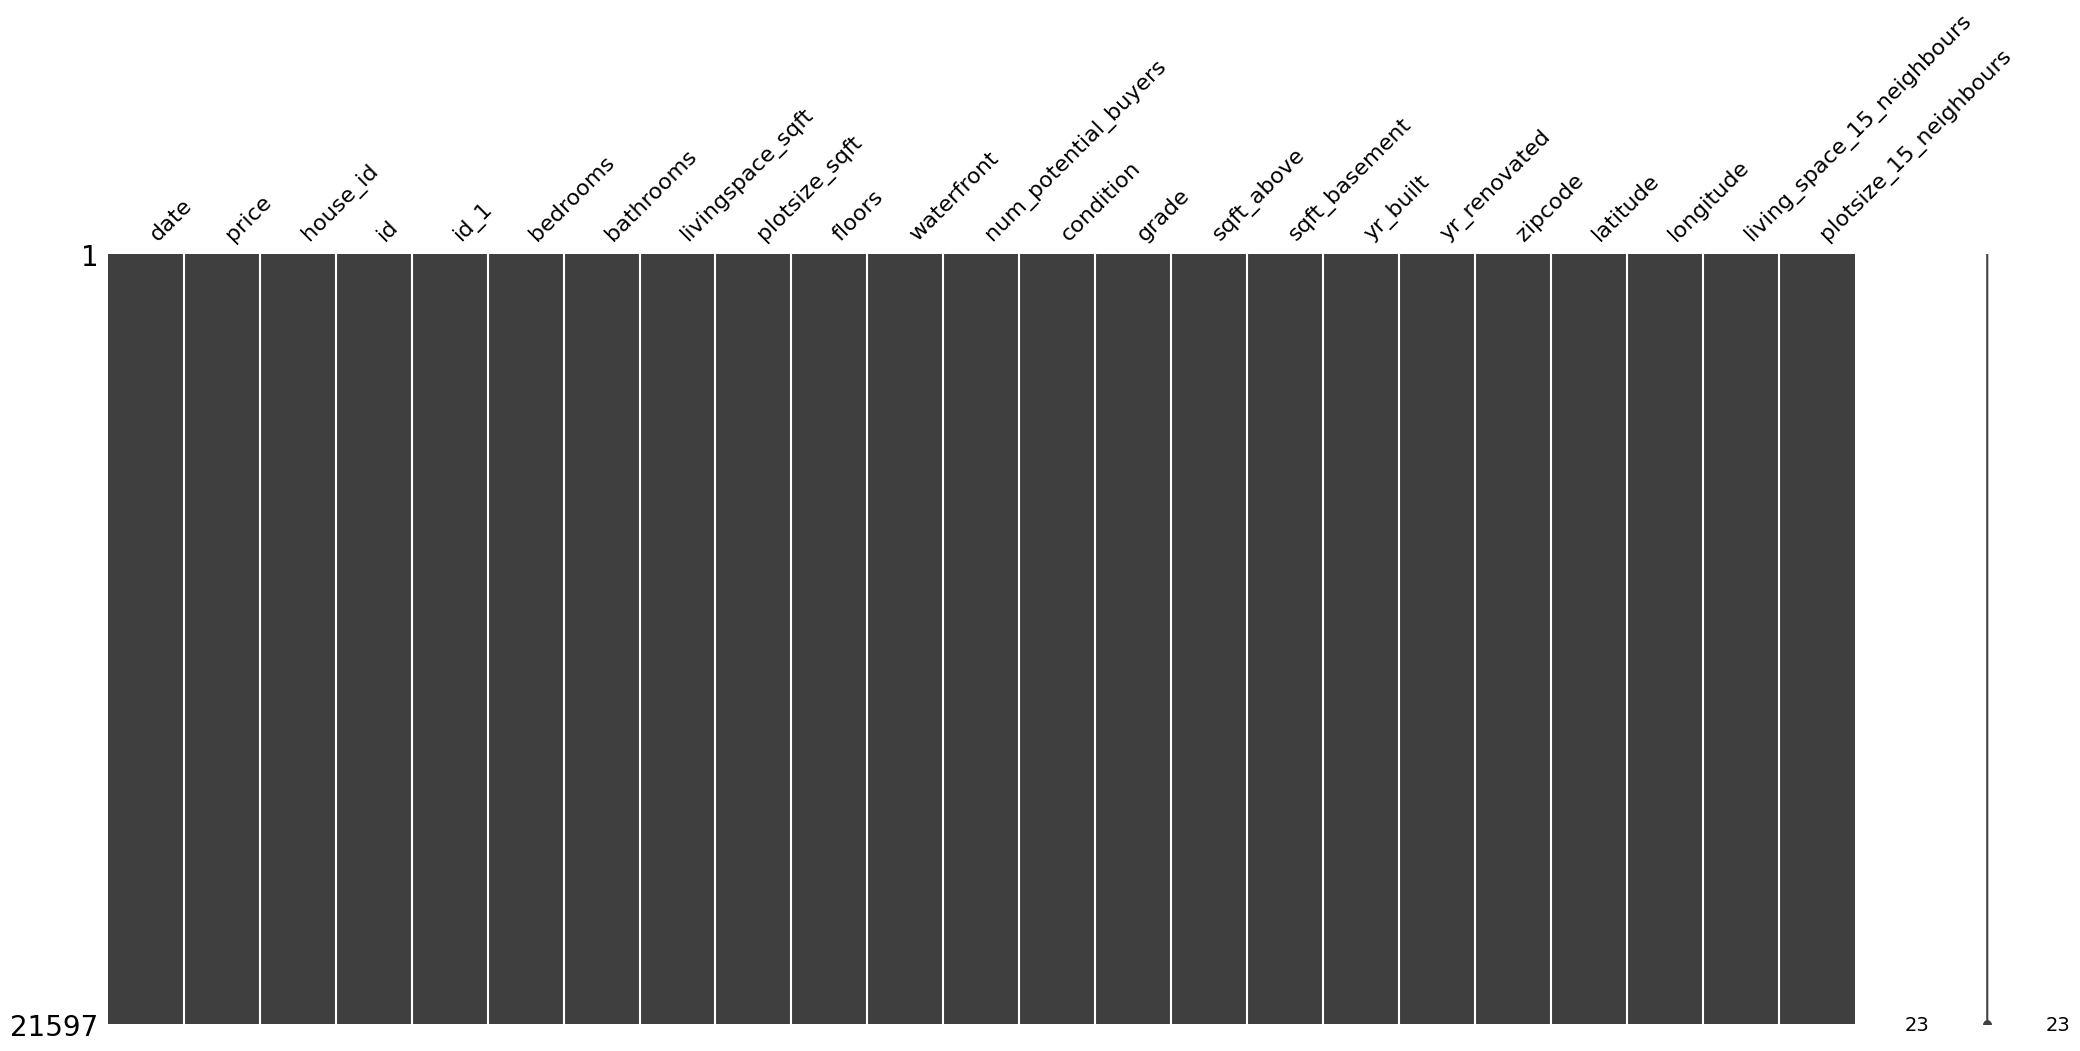

In [25]:
msno.matrix(df_house)

<font size="10">Data visualisation

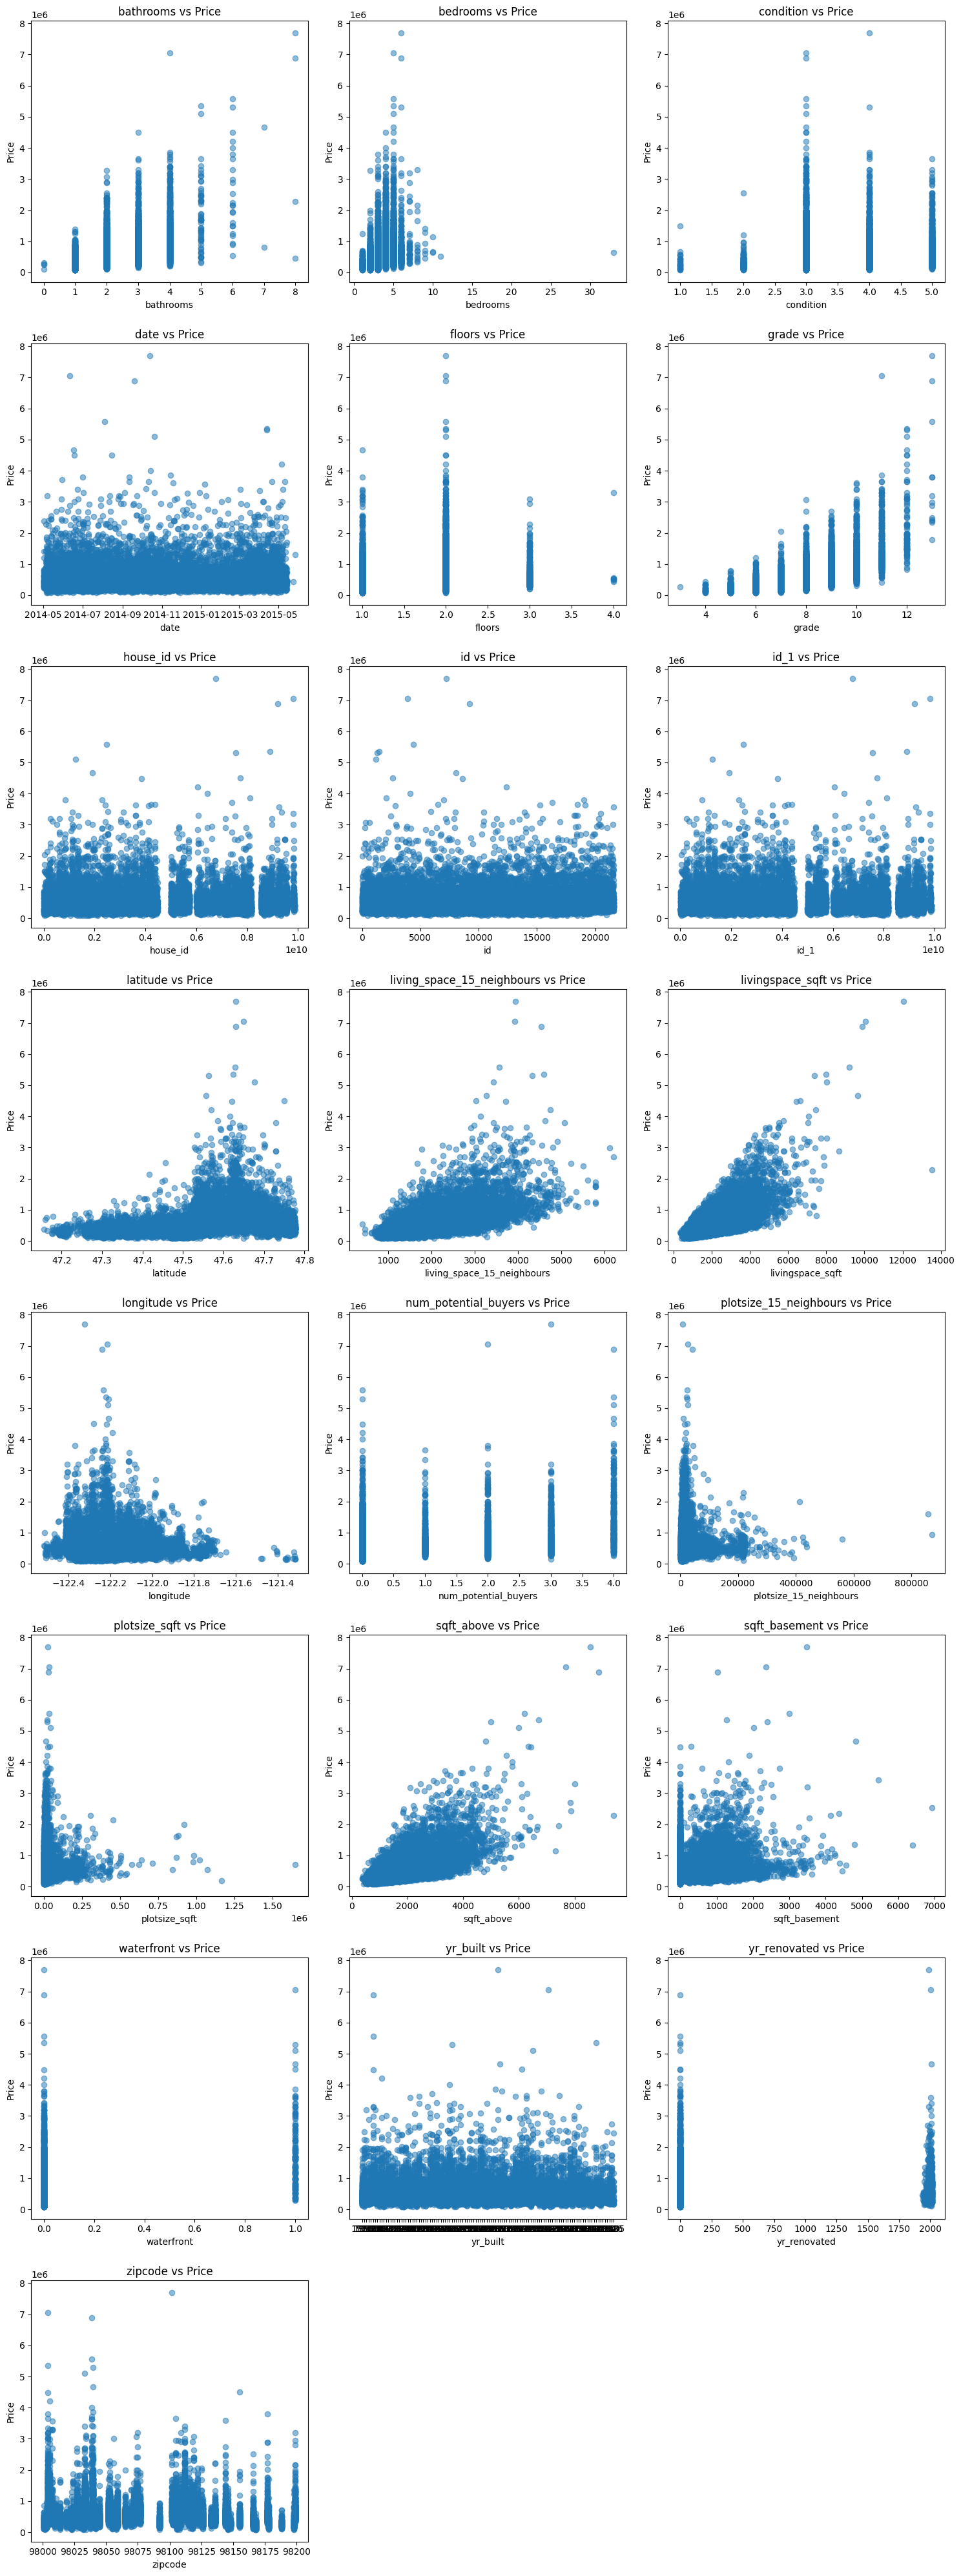

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns excluding 'price'
x_columns = df_house.columns.difference(['price'])

# Calculate the number of rows and columns for the subplots
num_plots = len(x_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot scatter plots for each column against 'price'
for i, col in enumerate(x_columns):
    ax = axes[i]
    ax.scatter(df_house[col], df_house['price'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(f'{col} vs Price')

# Remove any unused subplots
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# List of columns excluding 'price'
x_columns = df_house.columns.difference(['price'])

# Calculate the number of rows and columns for the subplots
num_plots = len(x_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot box plots for each column against 'price'
for i, col in enumerate(x_columns):
    ax = axes[i]
    df_house.boxplot(column='price', by=col, ax=ax)
    ax.set_title(f'{col} vs Price')
    ax.set_ylabel('Price')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  

# Remove any unused subplots
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


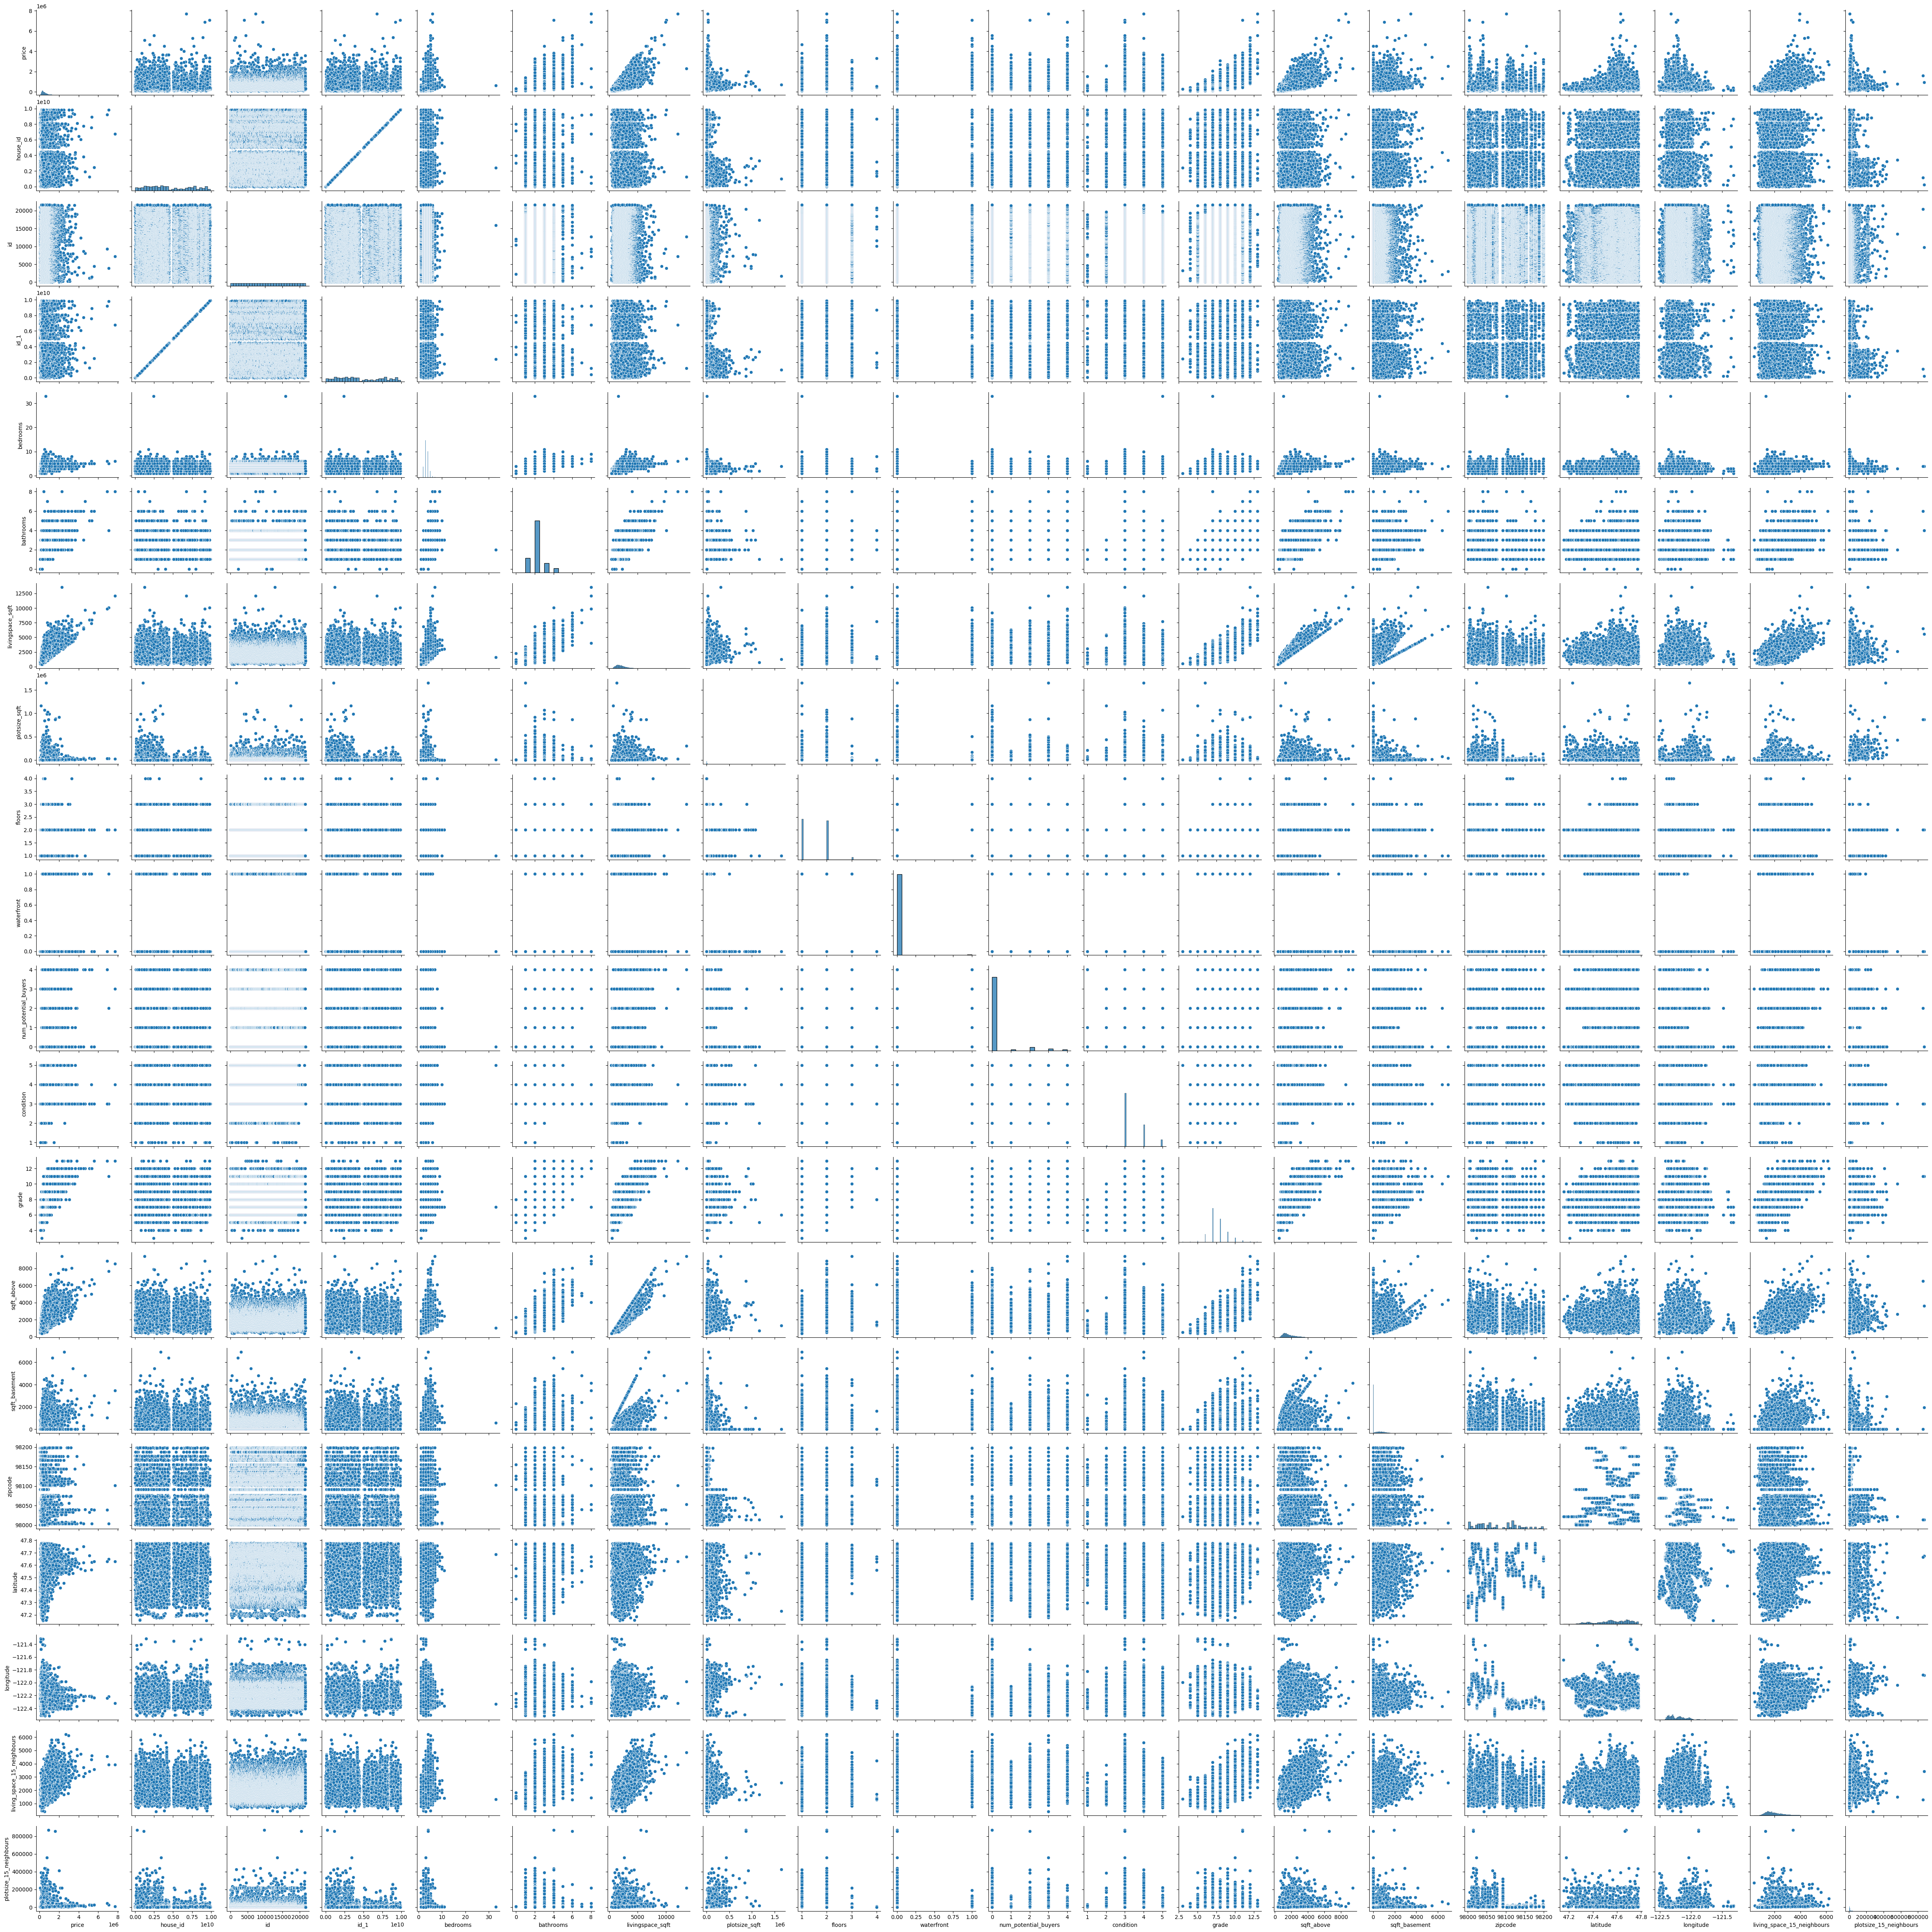

In [ ]:

#sns.pairplot(df_house)
#plt.show()
  

In [ ]:
import pandas as pd
import altair as alt
import json
import requests

# Load your dataset
df_house = pd.read_csv('data/eda.csv')

# Load GeoJSON file for Washington state zip codes
geojson_url = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json'
response = requests.get(geojson_url)
geojson_data = json.loads(response.text)

# Convert GeoJSON features to a DataFrame
zip_code_features = geojson_data['features']
df_geojson = pd.DataFrame(zip_code_features)

# Extract the ZCTA5CE10 property from the properties dictionary
df_geojson['ZCTA5CE10'] = df_geojson['properties'].apply(lambda x: x['ZCTA5CE10'])

# Convert the zipcode column to string
df_house['zipcode'] = df_house['zipcode'].astype(str)

# Merge your data with GeoJSON data
df_merged = pd.merge(df_geojson, df_house, left_on='ZCTA5CE10', right_on='zipcode', how='left')

# Create an Altair GeoJSON data source
source = alt.Data(values=df_merged)

# Create the choropleth map
chart = alt.Chart(source).mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    color='price:Q',
    tooltip=[
        alt.Tooltip('ZCTA5CE10:N', title='Zip Code'),
        alt.Tooltip('price:Q', title='Average Price')
    ]
).project(
    type='identity',
    reflectY=True
).properties(
    width=500,
    height=300
).configure_view(
    strokeWidth=0
)

# Display the chart
chart.show()

# Save the visualization as an HTML file
#chart.save('geospatial_visualization.html')


ValueError: 'show' method requires the altair_viewer package. See http://github.com/altair-viz/altair_viewer

In [ ]:

'''df_house_pricegroup = df_house.groupby('price').mean()
df_house_pricegroup.tail()
print(df_house_pricegroup.info)'''


"df_house_pricegroup = df_house.groupby('price').mean()\ndf_house_pricegroup.tail()\nprint(df_house_pricegroup.info)"

In [ ]:
'''prices = [50000, 100000, 500000, 1000000, 5000000, 10000000]

plt.scatter(prices, df_house_pricegroup.house_id)
plt.xlabel('Prices')'''

"prices = [50000, 100000, 500000, 1000000, 5000000, 10000000]\n\nplt.scatter(prices, df_house_pricegroup.house_id)\nplt.xlabel('Prices')"

In [ ]:
#bins = pd.cut(df_house['Price'], [0, 100, 250, 1500])

#df.groupby(bins)['Price'].agg(['count', 'sum'])

KeyError: 'Price'

In [ ]:
# change data type to float - This won't work if one of them isn't the type
'''
df_house = df_house.astype({'price': float})
df_house = df_house.astype({'house_id': int})
df_house = df_house.astype({'id': int})
df_house = df_house.astype({'id_1': int})
df_house = df_house.astype({'bedrooms': float})
df_house = df_house.astype({'bathrooms': float})
df_house = df_house.astype({'livingspace_sqft': float})
df_house = df_house.astype({'plotsize_sqft' : float})
df_house = df_house.astype({'floors': float})
df_house = df_house.astype({'num_potential_buyers': float})
df_house = df_house.astype({'condition': int})
df_house = df_house.astype({'grade': int})
df_house = df_house.astype({'sqft_above': float})
df_house = df_house.astype({'sqft_basement': float})
df_house = df_house.astype({'yr_built': int})
df_house = df_house.astype({'yr_renovated': datetime})
df_house = df_house.astype({'zipcode': float})
df_house = df_house.astype({'latitude': float})
df_house = df_house.astype({'longitude': float})
df_house = df_house.astype({'living_space_15_neighbors': float})
df_house = df_house.astype({'plotsize_15_neighbors': float})
df_house.head()
'''
#df_house = df_house.astype({'yr_renovated': int})
#df_house.head()

date     price    house_id  id        id_1  bedrooms  bathrooms  \
0 2014-10-13  221900.0  7129300520   1  7129300520       3.0       1.00   
1 2014-12-09  538000.0  6414100192   2  6414100192       3.0       2.25   
2 2015-02-25  180000.0  5631500400   3  5631500400       2.0       1.00   
3 2014-12-09  604000.0  2487200875   4  2487200875       4.0       3.00   
4 2015-02-18  510000.0  1954400510   5  1954400510       3.0       2.00   

   livingspace_sqft  plotsize_sqft  floors  ...  grade  sqft_above  \
0            1180.0         5650.0     1.0  ...      7      1180.0   
1            2570.0         7242.0     2.0  ...      7      2170.0   
2             770.0        10000.0     1.0  ...      6       770.0   
3            1960.0         5000.0     1.0  ...      7      1050.0   
4            1680.0         8080.0     1.0  ...      8      1680.0   

   sqft_basement  yr_built  yr_renovated  zipcode  latitude  longitude  \
0            0.0      1955           0.0    98178   47.5112   -122.257   
1          400.0      1951       19910.0    98125   47.7210   -122.319   
2            0.0      1933           NaN    98028   47.7379   -122.233   
3          910.0      1965           0.0    98136   47.5208   -122.393   
4            0.0      1987           0.0    98074   47.6168   -122.045   

   living_space_15_neighbours  plotsize_15_neighbours  
0                      1340.0                  5650.0  
1                      1690.0                  7639.0  
2                      2720.0                  8062.0  
3                      1360.0                  5000.0  
4                      1800.0                  7503.0  

[5 rows x 23 columns]